In [1]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv", header=0)
df["Month"] = df['Month'].apply(lambda x: pd.to_datetime("200"+x))
df.set_index("Month", inplace=True)
df.describe()

Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000

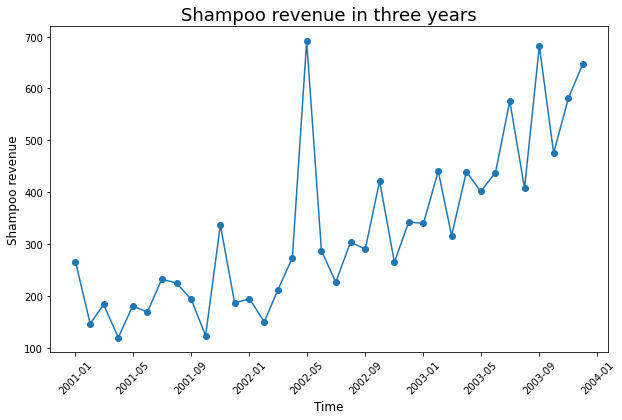

In [2]:
import matplotlib.pyplot as plt

# Create outlier in 2002-05
df.loc["2002-05"]["Sales"] = df.loc["2002-05"]["Sales"]+500

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], marker="o")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

In [3]:
diff_sales = df["Sales"][1:].values - df["Sales"][:-1].values

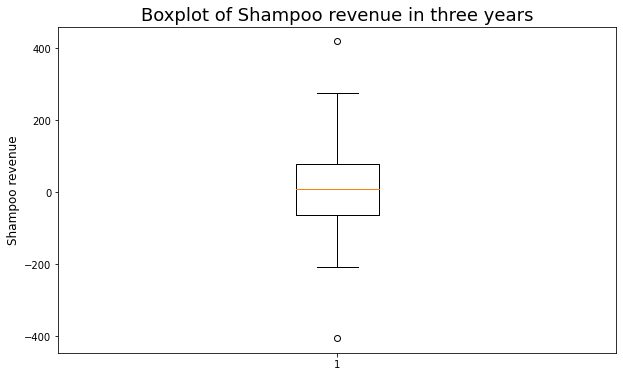

In [4]:
plt.figure(figsize=(10, 6))
plt.boxplot(diff_sales)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.title("Boxplot of Shampoo revenue in three years", fontsize=18)
plt.show()

In [5]:
import numpy as np

def detect_outliers(series):
  """
    series: 1-D numpy array input
  """
  Q1 = np.quantile(series, 0.25)
  Q3 = np.quantile(series, 0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  lower_compare = series <= lower_bound
  upper_compare = series >= upper_bound
  outlier_idxs = np.where(lower_compare | upper_compare)[0]
  return outlier_idxs

outlier_idxs=detect_outliers(diff_sales)
print("Outlier indices: ", outlier_idxs)
print("Outlier months: ", df.index[outlier_idxs+1].values)
print("Outlier values: ", diff_sales[outlier_idxs])

Outlier indices:  [15 16]
Outlier months:  ['2002-05-01T00:00:00.000000000' '2002-06-01T00:00:00.000000000']
Outlier values:  [ 418.1 -404.4]


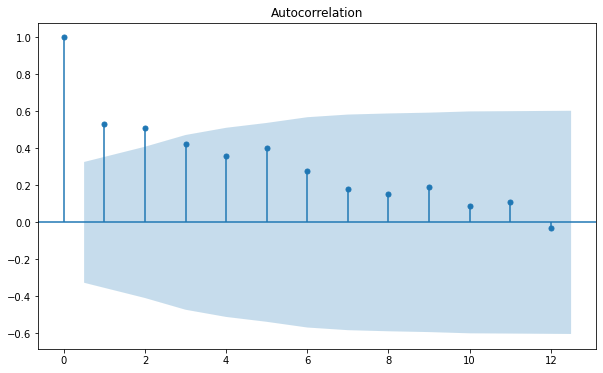

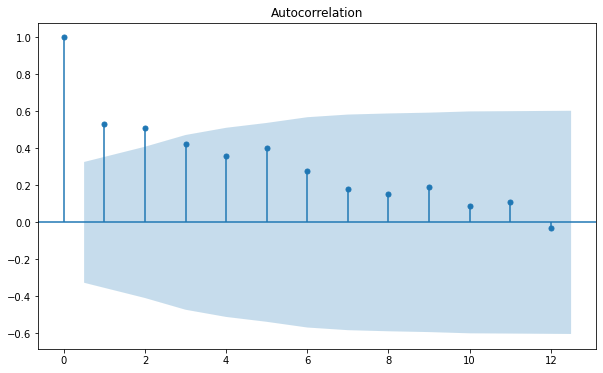

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("figure", figsize=(10, 6))
plot_acf(df["Sales"], lags = 12)

In [7]:
import numpy as np

def _interpolate(p1, p2, x):
  """
  p1: start point (x1, y1)
  p2: end point (x2, y2)
  """
  x1, y1 = p1
  x2, y2 = p2
  y = y1 + (x-x1)*(y2-y1)/(x2-x1)
  return y
  
# Missing at indice=1 
df["Sales"].iloc[1] = np.nan

p1 = (0, df["Sales"].iloc[0])
p2 = (2, df["Sales"].iloc[2])
x = 1
print(p1, p2)
print("interpolation value at x=1: ", _interpolate(p1, p2, 1))

(0, 266.0) (2, 183.1)
interpolation value at x=1:  224.55


In [8]:
df["Sales"].iloc[1] = np.nan
df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
df.head()

Sales
Month             
2001-01-01  266.00
2001-02-01  224.55
2001-03-01  183.10
2001-04-01  119.30
2001-05-01  180.30

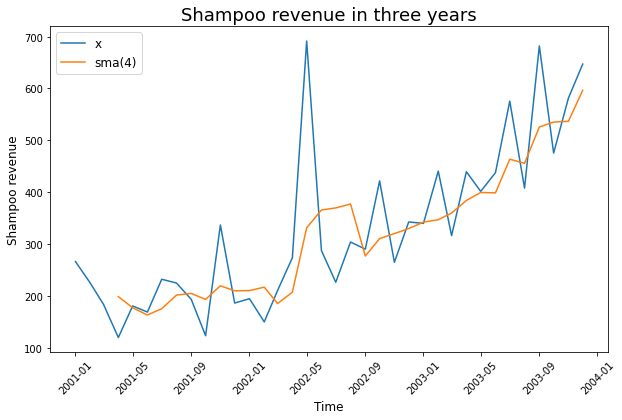

In [9]:
# Single moving average in pandas
df_sma = df.rolling(window=4).mean()
plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_sma["Sales"], label="sma(4)")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

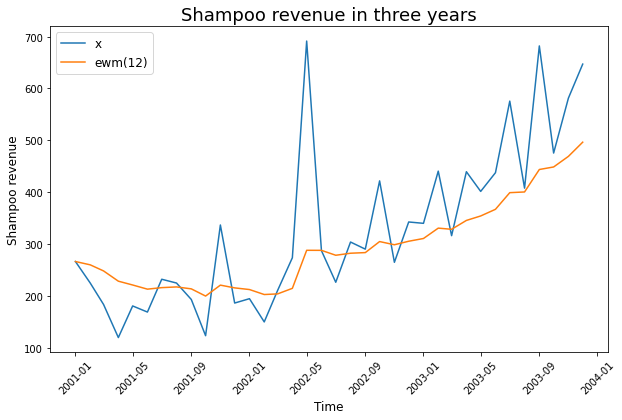

In [10]:
# Caculate exponential moving average
df_ewm = df.ewm(span=12, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_ewm["Sales"], label="ewm(12)")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

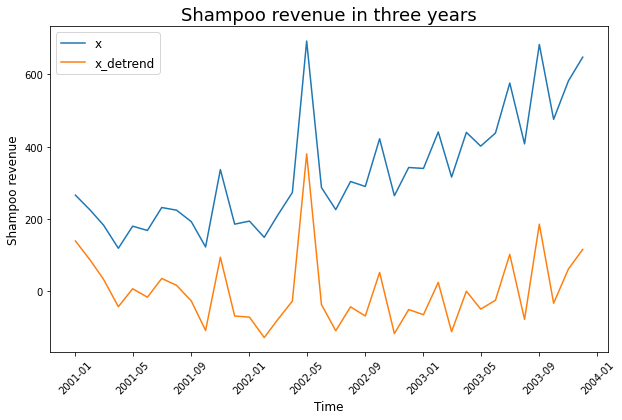

In [11]:
import numpy as np
from scipy import signal

x_detrend = signal.detrend(df["Sales"])
df_detrend = pd.DataFrame({"Sales_Detrend": x_detrend}, index=df.index)

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_detrend, label="x_detrend")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

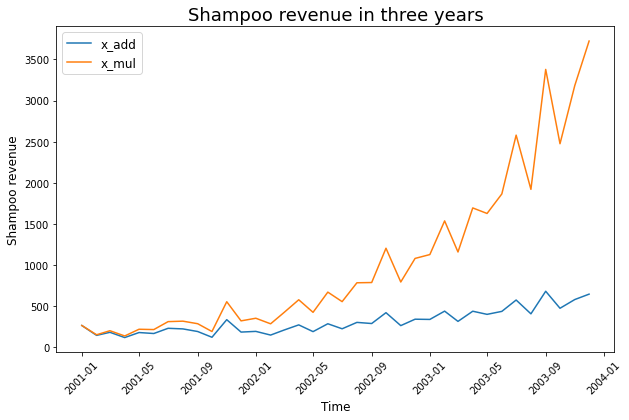

In [12]:
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv", header=0)
df["Month"] = df['Month'].apply(lambda x: pd.to_datetime("200"+x))
df.set_index("Month", inplace=True)

# Tạo chuỗi nhân tính
multip = np.arange(df.shape[0])
multip = np.exp(multip/20)
df_mul = df.copy()
df_mul["Sales"] = df_mul["Sales"]*multip

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x_add")
plt.plot(df_mul["Sales"], label="x_mul")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

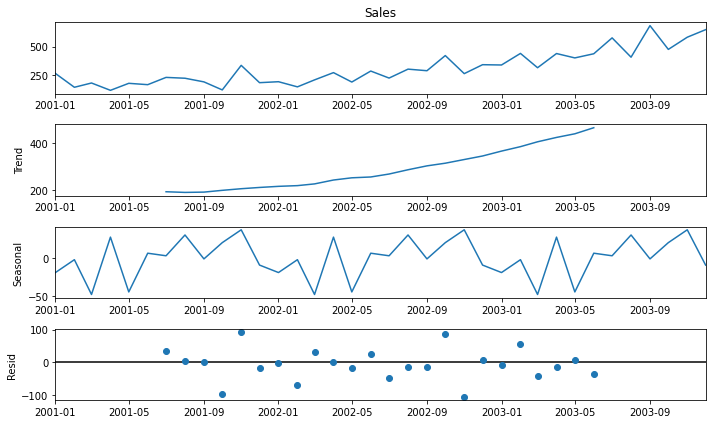

In [13]:
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Sales"], model='additive')
result.plot()
plt.show()

In [14]:
print(result.resid.shape)
print(result.seasonal.shape)
print(result.trend.shape)

(36,)
(36,)
(36,)
